In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df =df.drop(columns=['PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'])
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df.Age.median(),inplace=True)

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                    df['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((623, 3), (268, 3))

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled

array([[0.        , 0.63443842, 0.05182215],
       [0.        , 0.60922728, 0.14976542],
       [1.        , 0.00415984, 0.0915427 ],
       ...,
       [1.        , 0.34451027, 0.0150944 ],
       [1.        , 0.44535485, 0.03396254],
       [0.5       , 0.74788857, 0.07612293]])

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [10]:
np.round(X_train.describe(), 1)

,Pclass,Age,Fare
count,623.0,623.0,623.0
mean,2.3,29.5,32.5
std,0.8,13.0,48.3
min,1.0,0.7,0.0
25%,1.5,23.0,7.9
50%,3.0,28.0,15.0
75%,3.0,36.0,31.4
max,3.0,80.0,512.3


In [11]:

np.round(X_train_scaled.describe(), 1)

,Pclass,Age,Fare
count,623.0,623.0,623.0
mean,0.6,0.4,0.1
std,0.4,0.2,0.1
min,0.0,0.0,0.0
25%,0.2,0.3,0.0
50%,1.0,0.3,0.0
75%,1.0,0.4,0.1
max,1.0,1.0,1.0


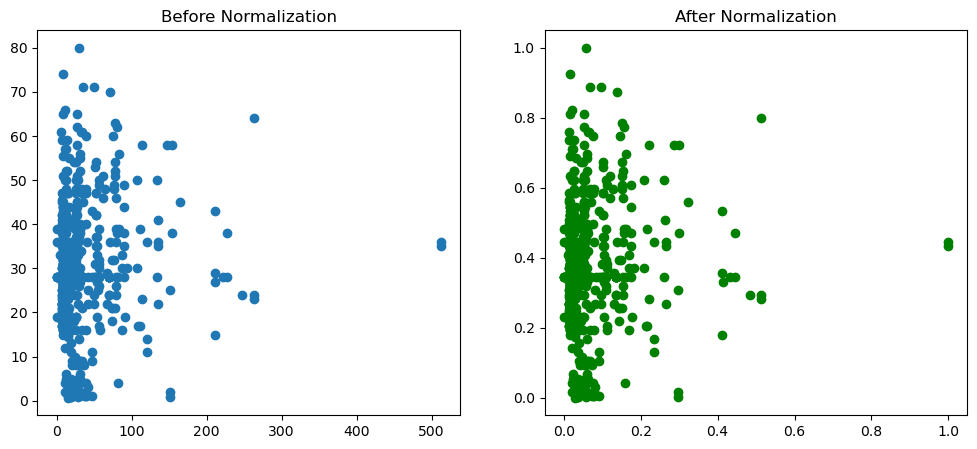

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before standardization 
ax1.scatter(X_train['Fare'], X_train['Age'])
ax1.set_title("Before Normalization")

# after standardization
ax2.scatter(X_train_scaled['Fare'], X_train_scaled['Age'],color='green')
ax2.set_title("After Normalization")
plt.show()

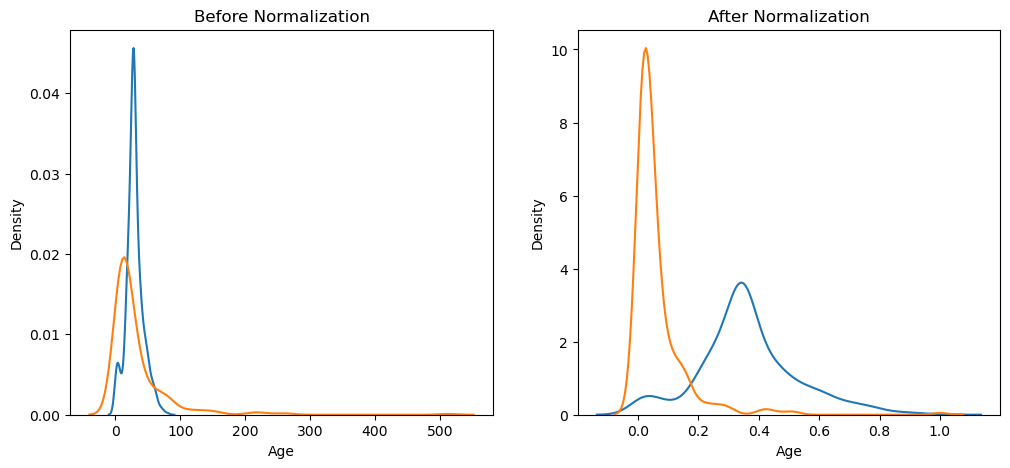

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before standardization 
ax1.set_title('Before Normalization')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Fare'], ax=ax1)

# after standardization
ax2.set_title('After Normalization')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Fare'], ax=ax2)
plt.show()